# Install required packages

In [147]:
%pip install transformers datasets
%pip install pandas
%pip install matplotlib
%pip install umap-learn
%pip install datashader bokeh holoviews colorcet scikit-image

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` befor

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import transformers


# Load Data

In [149]:
from pathlib import Path


DATA_DIR = Path.home() / "Documents" / "SemanticsOfSustainability" / "data" / "Joris"
assert DATA_DIR.is_dir()


In [150]:
ANP_DIR = DATA_DIR / "ANP" / "CleanFiles_perYear"
assert ANP_DIR.is_dir()


In [151]:
def to_decade(year: int) -> str:
    start = int(year / 10) * 10
    return f"{start} - {start+10}"


## ANP

In [152]:
from tqdm import tqdm


FILE_GLOB = "ANP_19[0-9][0-9].csv.gz"
ENCODING = "iso8859_15"

anp = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="content")
            for f in ANP_DIR.glob(FILE_GLOB)
        ),
        total=len(list(ANP_DIR.glob(FILE_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()
anp["decade"] = anp["year"].apply(to_decade)


anp


Reading: 100%|██████████| 48/48 [00:17<00:00,  2.75file/s]


,filename,content,date,year,month,day,issue,decade
0,anp_1952_01_01_10_ocr.xml,Red.: Datum: veldman 1-1-52 Tijd: 13 ttt^....,1952-01-01,1952,1,1,10,1950 - 1960
1,anp_1952_01_01_11_ocr.xml,Red. Datum: Tijd: Onderwerp: veltmeijer 1...,1952-01-01,1952,1,1,11,1950 - 1960
2,anp_1952_01_01_12_ocr.xml,/3* Red. Datum: Tijd: Onderwerp: veltmei...,1952-01-01,1952,1,1,12,1950 - 1960
3,anp_1952_01_01_13_ocr.xml,Red.: Datum: Tijd: Onderwerp: veltmeijer ...,1952-01-01,1952,1,1,13,1950 - 1960
4,anp_1952_01_01_14_ocr.xml,Red.: Datum: Tijd: Onderwerp: mallon 1-1-...,1952-01-01,1952,1,1,14,1950 - 1960
...,...,...,...,...,...,...,...,...
1474644,anp_1973_12_31_96_ocr.xml,Red.: Datum: Tijd: Onderwerp: kreek 31. 12. 7...,1973-12-31,1973,12,31,96,1970 - 1980
1474645,anp_1973_12_31_97_ocr.xml,Red.: Datum: Tijd: Onderwerp: kuy 31-12-...,1973-12-31,1973,12,31,97,1970 - 1980
1474646,anp_1973_12_31_98_ocr.xml,Red. Datum: Tijd: Onderwerp: kreek 31. 12...,1973-12-31,1973,12,31,98,1970 - 1980
1474647,anp_1973_12_31_99_ocr.xml,Red. Datum: Tijd: Onderwerp: zijl 31-12-...,1973-12-31,1973,12,31,99,1970 - 1980


Text(0, 0.5, 'Number of Documents')

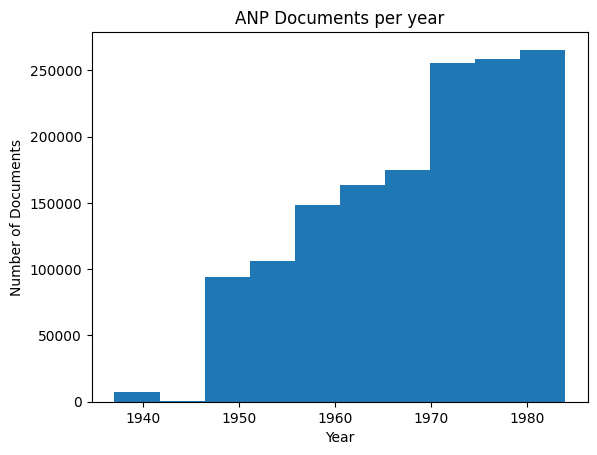

In [153]:
plt.hist(anp.year, label="Year")
plt.title("ANP Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

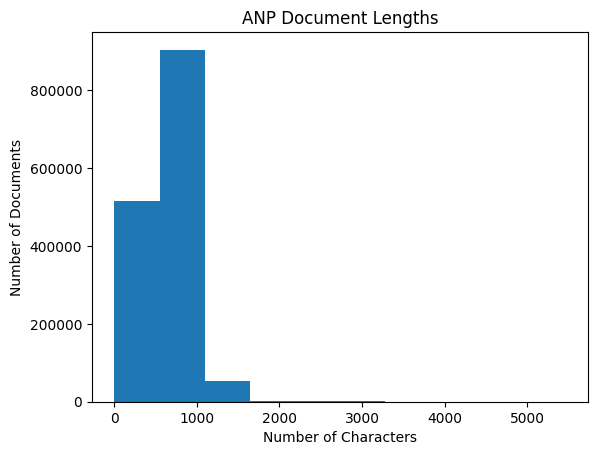

In [154]:
plt.hist(anp.content.str.len())
plt.title("ANP Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


## StatenGeneraal

In [155]:
SG_DIR = DATA_DIR / "StatenGeneraal"

assert SG_DIR.is_dir()

SG_GLOB = "StatenGeneraal_[12][890][0-9][0-9].csv.gz"


In [156]:
from tqdm import tqdm

ENCODING = "iso8859_15"

staten_generaal = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="Content")
            for f in SG_DIR.glob(SG_GLOB)
        ),
        total=len(list(SG_DIR.glob(SG_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()

staten_generaal


Reading: 100%|██████████| 205/205 [01:37<00:00,  2.10file/s]


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers
0,144302,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Rijksbegroting voor het dienstjaar 1976. Defensie,BRIEF VAN DE MINISTER VAN DEFENSIE,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
1,144303,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging Liquidatiewet invaliditeitswetten,KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
2,144304,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,"Naturalisatie van Bakarbessy, Jacobus Hermanus...",KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
3,144305,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging van de Kleuteronderwijswet (Stb. 197...,VERSLAG,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
4,144306,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Uitvoering van artikel 15 van de Comptabilitei...,NOTA NAAR AANLEIDING VAN HET VERSLAG,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187141,108,1857-12-02 00:00:00,nl.proc.sgd.d.185718580000114,Handelingen Tweede Kamer 1857-1858 02 december...,Verbatim Proceedings,<NA>,1857,65ste vel. â 227 â Tweede Kamer.ZITTIN G V...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00697: mp, de heer: Kien; nl.m.00473: cha..."
187142,109,1857-12-07 00:00:00,nl.proc.sgd.d.185718580000115,Handelingen Tweede Kamer 1857-1858 07 december...,Verbatim Proceedings,<NA>,1857,G7stc vel. â 235 TV Tweede Kamer.27ste IIfT1...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00855: mp, De heer: baron van Lynden; nl...."
187143,110,1857-12-10 00:00:00,nl.proc.sgd.d.185718580000116,Handelingen Tweede Kamer 1857-1858 10 december...,Verbatim Proceedings,<NA>,1857,68ste vel. 237 â Tweede Kamer.Z1TITN G VAN D...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.02118: government, minister: Vrolik; nl.m..."
187144,111,1857-12-11 00:00:00,nl.proc.sgd.d.185718580000117,Handelingen Tweede Kamer 1857-1858 11 december...,Verbatim Proceedings,<NA>,1857,73ste vel. â 255 â Tweede Kamer.LXf. liuit...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00918: mp, De heer: Meijlink; nl.m.01557:..."


Text(0, 0.5, 'Number of Documents')

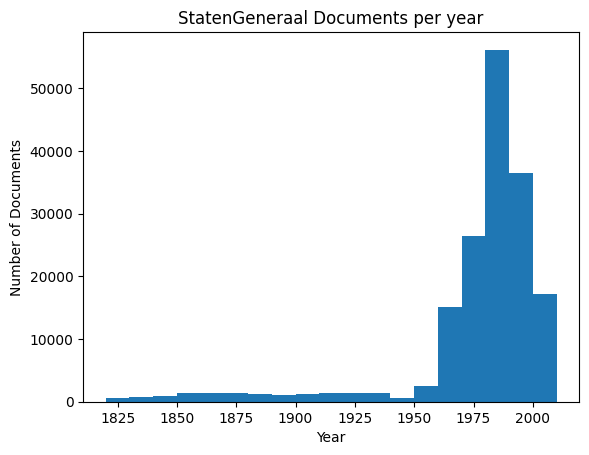

In [157]:
plt.hist(staten_generaal.year, label="Year", bins=range(1820, 2020, 10))
plt.title("StatenGeneraal Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

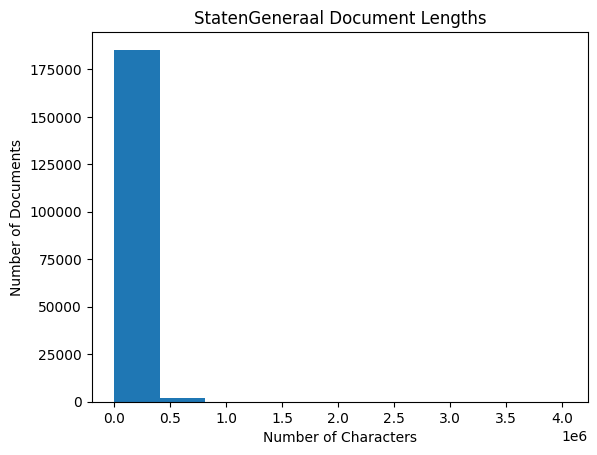

In [224]:
plt.hist(staten_generaal.Content.str.len())
plt.title("StatenGeneraal Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


# Load Model

In [159]:
MODEL_NAME = "DTAI-KULeuven/robbertje-1-gb-non-shuffled"  # NL MODEL TODO: is the model trained on lowercased data?

MODEL_MAX_LENGTH = 512


In [160]:
from transformers import AutoTokenizer, pipeline
from transformers.pipelines.feature_extraction import FeatureExtractionPipeline


tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, model_max_length=MODEL_MAX_LENGTH, truncation=True
)
# model = RobertaModel.from_pretrained(MODEL_NAME)

# FIXME: cannot use pipeline for extracting layers other than the last one
model: FeatureExtractionPipeline = pipeline(
    "feature-extraction",
    model=MODEL_NAME,
    tokenizer=tokenizer,
    max_length=MODEL_MAX_LENGTH,
    truncation=True,
)


Some weights of the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this mode

# Compute Embeddings

In [161]:
TERM = "duurzaam"


In [162]:
term_token_ids = model.tokenizer(TERM)["input_ids"]
print(term_token_ids)

print(model.tokenizer.convert_ids_to_tokens(term_token_ids))


[0, 6395, 4249, 2]
['<s>', 'duur', 'zaam', '</s>']


## ANP

In [163]:
anp[TERM] = anp.content.str.contains(TERM)
anp.loc[anp[TERM]]


,filename,content,date,year,month,day,issue,decade,duurzaam
3108,anp_1952_02_11_46_ocr.xml,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952-11-02,1952,2,11,46,1950 - 1960,True
15594,anp_1952_07_19_31_ocr.xml,"Red: Kprp, Datum: 19 Juli' 52 Tijd: HOC ...",1952-07-19,1952,7,19,31,1950 - 1960,True
23851,anp_1952_11_03_25_ocr.xml,Red: mallon Datum: 3-*ll?52 Tijd: Onderwe...,1952-03-11,1952,11,3,25,1950 - 1960,True
23861,anp_1952_11_03_34_ocr.xml,Red: Datum: Tijd: Onderwerp: m-llon 3-11...,1952-03-11,1952,11,3,34,1950 - 1960,True
27918,anp_1952_12_29_48_ocr.xml,"Red: Rpmijn Datum: 29 Dec. 52 Tijd: 23, 0...",1952-12-29,1952,12,29,48,1950 - 1960,True
...,...,...,...,...,...,...,...,...,...
1444295,anp_1973_06_16_152_ocr.xml,Red.: Datum: Tijd: Onderwerp: .Leeuw... 1...,1973-06-16,1973,6,16,152,1970 - 1980,True
1444406,anp_1973_06_17_10_ocr.xml,Red.: Datum: Tijd: Onderwerp: duijv . 1....,1973-06-17,1973,6,17,10,1970 - 1980,True
1444456,anp_1973_06_17_1_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjy 17 6 ...,1973-06-17,1973,6,17,1,1970 - 1980,True
1444475,anp_1973_06_17_37_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjv 17. ...,1973-06-17,1973,6,17,37,1970 - 1980,True


Text(0, 0.5, 'Number of Documents')

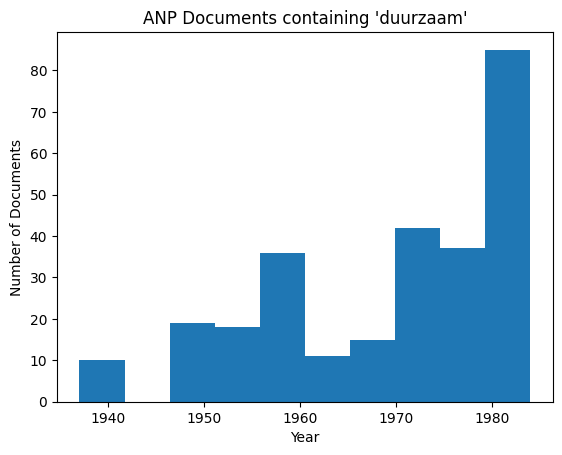

In [164]:
plt.hist(anp.loc[anp.content.str.contains(TERM)].year)
plt.title(f"ANP Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

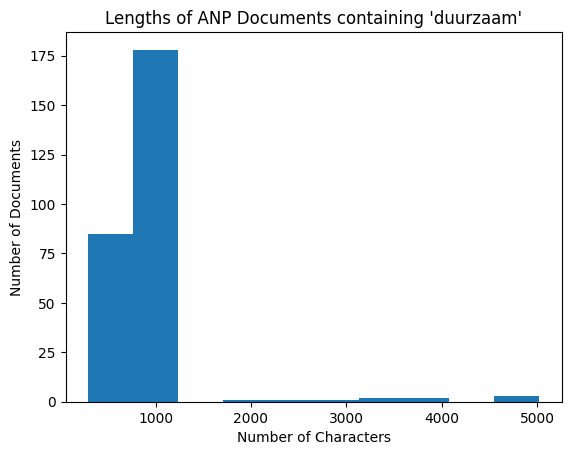

In [234]:
plt.hist(anp.loc[anp[TERM]].content.str.len())
plt.title(f"Lengths of ANP Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")

In [165]:
import importlib
import src

importlib.reload(src)

from src import Sentence

# TODO: split sentences for better embeddings and for handling longer texts

anp.loc[anp[TERM], "Sentence"] = anp.loc[anp[TERM]].apply(
    lambda row: Sentence(row["content"], model, row["year"], row["filename"]),
    axis=1,
)

anp["Sentence"].dropna()


3108       Sentence(text=' Red.: mallon :-:. raa. üx  Dat...
15594      Sentence(text=" Red:  Kprp,  Datum:  19 Juli' ...
23851      Sentence(text=' Red:  mallon  Datum:  3-*ll?52...
23861      Sentence(text=' Red:  Datum:  Tijd:  Onderwerp...
27918      Sentence(text=' Red:  Rpmijn  Datum:  29 Dec. ...
                                 ...                        
1444295    Sentence(text=" Red.:  Datum:  Tijd:  Onderwer...
1444406    Sentence(text=" Red.:  Datum:  Tijd:  Onderwer...
1444456    Sentence(text=' Red.:  Datum:  Tijd: Onderwerp...
1444475    Sentence(text=' Red.:  Datum:  Tijd:  Onderwer...
1454199    Sentence(text=' Red.:  Datum:  Tijd:  Onderwer...
Name: Sentence, Length: 273, dtype: object

In [181]:
from tqdm import tqdm

tqdm.pandas(desc="Computing embeddings", unit="text")

anp["embeddings"] = anp.loc[anp["Sentence"].notna(), "Sentence"].progress_apply(
    lambda s: s.embeddings_matrix(TERM)
)
anp["embeddings"].dropna()


Computing embeddings: 100%|██████████| 273/273 [01:55<00:00,  2.36sentence/s]


3108       [[0.4188813269138336, -0.36967822909355164, 0....
15594                                                     []
23851      [[0.12576256692409515, 0.36140355467796326, 0....
23861      [[0.16293135285377502, 0.07791978865861893, 0....
27918                                                     []
                                 ...                        
1444295    [[0.2423732578754425, -0.6394202709197998, 0.2...
1444406    [[-0.6191000938415527, -0.2804802358150482, 0....
1444456    [[0.21491506695747375, 0.5356446504592896, -0....
1444475    [[-0.00537773035466671, 0.46493324637413025, -...
1454199    [[-0.11271455883979797, 0.0527951680123806, 0....
Name: embeddings, Length: 273, dtype: object

In [182]:
# Candidate sentences with no actual matches for the term

anp.loc[anp["embeddings"].str.len() == 0]


,filename,content,date,year,month,day,issue,decade,duurzaam,Sentence,embeddings
15594,anp_1952_07_19_31_ocr.xml,"Red: Kprp, Datum: 19 Juli' 52 Tijd: HOC ...",1952-07-19,1952,7,19,31,1950 - 1960,True,"Sentence(text="" Red: Kprp, Datum: 19 Juli' ...",[]
27918,anp_1952_12_29_48_ocr.xml,"Red: Rpmijn Datum: 29 Dec. 52 Tijd: 23, 0...",1952-12-29,1952,12,29,48,1950 - 1960,True,Sentence(text=' Red: Rpmijn Datum: 29 Dec. ...,[]
28957,anp_1976_01_07_39_ocr.xml,Red.: cas Datum: 7-1-76 Tijd: Onderwerp: ...,1976-07-01,1976,1,7,39,1970 - 1980,True,Sentence(text=' Red.: cas Datum: 7-1-76 Tijd...,[]
83532,anp_1968_02_22_59_ocr.xml,Red.: Datu m: Tijd: Onderwerp: ..meij. e...,1968-02-22,1968,2,22,59,1960 - 1970,True,Sentence(text=' Red.: Datu m: Tijd: Onderw...,[]
159960,anp_1950_04_12_47_ocr.xml,Cremers 18 eVl9 uur 12. 4. 50 Het vorig jaar ...,1950-12-04,1950,4,12,47,1950 - 1960,True,Sentence(text=' Cremers 18 eVl9 uur 12. 4. 50 ...,[]
171251,anp_1950_09_03_61_ocr.xml,Cremers zondagweekoverzicht 3. 9*50 Het bese...,1950-03-09,1950,9,3,61,1950 - 1960,True,"Sentence(text="" Cremers zondagweekoverzicht 3....",[]
338005,anp_1983_02_10_117_ocr.xml,Red.: ser Datum: 10-2-83 Tijd: 11. 00 Ond...,1983-10-02,1983,2,10,117,1980 - 1990,True,Sentence(text=' Red.: ser Datum: 10-2-83 Ti...,[]
338103,anp_1983_02_10_53_ocr.xml,Red. ser Datum: 10-2-83 Tijd: 11. 00 Onde...,1983-10-02,1983,2,10,53,1980 - 1990,True,Sentence(text=' Red. ser Datum: 10-2-83 Tij...,[]
362737,anp_1983_07_09_15_ocr.xml,^ Red. Datum: Tijd: Onderwerp: kuy 9-7-...,1983-09-07,1983,7,9,15,1980 - 1990,True,Sentence(text=' ^ Red. Datum: Tijd: Onderw...,[]
363292,anp_1983_07_13_128_ocr.xml,Red.: Datum: Tijd: Onderwerp: spa 13 7 83 !<....,1983-07-13,1983,7,13,128,1980 - 1990,True,Sentence(text=' Red.: Datum: Tijd: Onderwerp: ...,[]


In [189]:
indices_anp = []
embeddings_anp = []

for index, embeddings in anp.loc[anp["embeddings"].notna(), "embeddings"].items():
    for embedding in embeddings:
        indices_anp.append(index)
        embeddings_anp.append(embedding)


In [193]:
embeddings_anp = np.array(embeddings_anp)

assert embeddings_anp.shape[1] == model.model.config.hidden_size

embeddings_anp.shape


(263, 768)

## StatenGeneraal

In [194]:
staten_generaal[TERM] = staten_generaal.Content.str.contains(TERM)
staten_generaal.loc[staten_generaal[TERM]]


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers,duurzaam,Sentence
115,144430,1976-01-23,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Afsluiting Oosterschelde,BRIEF VAN DE MINISTER VAN VERKEER EN WATERSTAAT,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True,Sentence(text='Tweede Kamer der Staten-Generaa...
155,144471,1976-01-29,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 29 januari ...,Handelingen Tweede Kamer 1975-1976 29 januari ...,1976,42ste Vergadering Voorzitter: Vondeling Tegenw...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534...",StatenGeneraal,<NA>,<NA>,True,Sentence(text='42ste Vergadering Voorzitter: V...
163,144479,1976-01-30,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Vaststelling van Boek 6 van het nieuwe Burgerl...,MEMORIE VAN ANTWOORD,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True,Sentence(text='Tweede Kamer der Staten-Generaa...
174,144507,1976-02-03,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Kwantitatieve beperkingen in de olieaanvoer,VERSLAG VAN OPENBARE GESPREKKEN,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True,Sentence(text='Tweede Kamer der Staten-Generaa...
220,144561,1976-02-10,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 10 februari...,Handelingen Tweede Kamer 1975-1976 10 februari...,1976,46ste Vergadering Dinsdag 10 februari 1976 Aan...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718...",StatenGeneraal,<NA>,<NA>,True,Sentence(text='46ste Vergadering Dinsdag 10 fe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187064,31,1857-05-13 00:00:00,nl.proc.sgd.d.185618570000168,Handelingen Tweede Kamer 1856-1857 13 mei 1857...,Verbatim Proceedings,<NA>,1857,212de vel. 773 Tweede Kamer.XCIX. Intrekking v...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts...",True,Sentence(text='212de vel. 773 Tweede Kamer.XCI...
187080,47,1857-06-30 00:00:00,nl.proc.sgd.d.185618570000184,Handelingen Tweede Kamer 1856-1857 30 juni 185...,Verbatim Proceedings,<NA>,1857,266ste vel. â 975 â Tweede Kamer.ZITTIN G ...,<NA>,<NA>,TweedeKamer,1856-1857,": mp, De heer: Nolthenlu s; nl.m.00455: mp, De...",True,Sentence(text='266ste vel. â\x80\x94 975 â\x80...
187086,53,1857-07-07 00:00:00,nl.proc.sgd.d.185618570000190,Handelingen Tweede Kamer 1856-1857 07 juli 185...,Verbatim Proceedings,<NA>,1857,290ste vel. 1065 Tweede Kamer.LXXXIV . Lager O...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts...",True,Sentence(text='290ste vel. 1065 Tweede Kamer.L...
187112,79,1857-12-23 00:00:00,nl.proc.sgd.d.185718580000052,Handelingen Eerste Kamer 1857-1858 23 december...,Verbatim Proceedings,<NA>,1857,21ste vel. 67 â Eerste Kamer.ZITTIN G VAN DE...,<NA>,<NA>,EersteKamer,1857-1858,"nl.m.01176: mp, De heer: Sassen; : mp, De heer...",True,Sentence(text='21ste vel. 67 â\x80\x94 Eerste ...


Text(0, 0.5, 'Number of Documents')

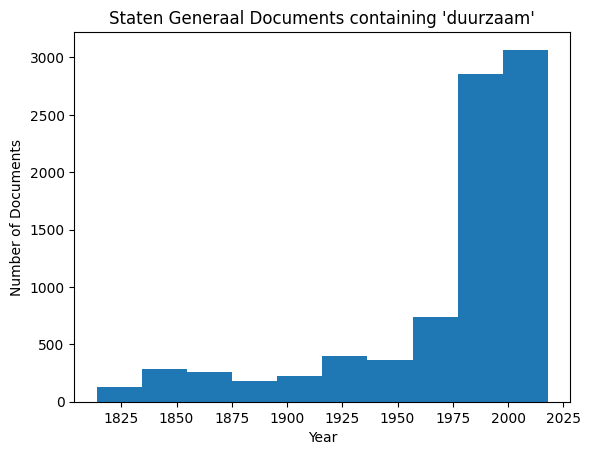

In [176]:
plt.hist(staten_generaal.loc[staten_generaal[TERM]].year)
plt.title(f"Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

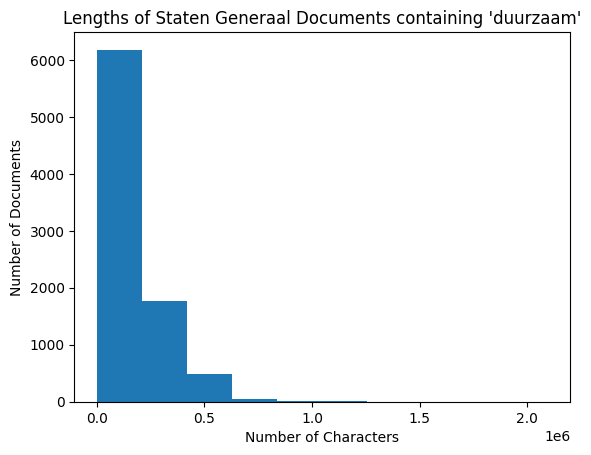

In [232]:
plt.hist(staten_generaal.loc[staten_generaal[TERM]].Content.str.len())
plt.title(f"Lengths of Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")


In [195]:
import importlib
import src

importlib.reload(src)

from src import Sentence

# TODO: split sentences for better embeddings and for handling longer texts

staten_generaal.loc[staten_generaal[TERM], "Sentence"] = staten_generaal.loc[
    staten_generaal[TERM]
].apply(
    lambda row: Sentence(row["Content"], model, row["year"], row["RecId"]),
    axis=1,
)

staten_generaal["Sentence"].dropna()


115       Sentence(text='Tweede Kamer der Staten-Generaa...
155       Sentence(text='42ste Vergadering Voorzitter: V...
163       Sentence(text='Tweede Kamer der Staten-Generaa...
174       Sentence(text='Tweede Kamer der Staten-Generaa...
220       Sentence(text='46ste Vergadering Dinsdag 10 fe...
                                ...                        
187064    Sentence(text='212de vel. 773 Tweede Kamer.XCI...
187080    Sentence(text='266ste vel. â\x80\x94 975 â\x80...
187086    Sentence(text='290ste vel. 1065 Tweede Kamer.L...
187112    Sentence(text='21ste vel. 67 â\x80\x94 Eerste ...
187138    Sentence(text='54ste vel. â\x80\x94 1S5 â\x80\...
Name: Sentence, Length: 8498, dtype: object

In [196]:
from tqdm import tqdm

tqdm.pandas(desc="Computing embeddings", unit="text")

staten_generaal["embeddings"] = staten_generaal.loc[
    staten_generaal["Sentence"].notna(), "Sentence"
].progress_apply(lambda s: s.embeddings_matrix(TERM))
staten_generaal["embeddings"].dropna()


Computing embeddings:   0%|          | 10/8498 [26:08<369:45:30, 156.83s/text]


KeyboardInterrupt: 

# Plot

In [98]:
import umap.plot

umap.plot.output_notebook()

title = f"UMAP Embeddings Projections for '{TERM}'"


Loading BokehJS ...

In [99]:
mapper = umap.UMAP().fit(embeddings_anp)


In [100]:
anp.loc[indices_anp, "x"] = mapper.embedding_[:, 0]
anp.loc[indices_anp, "y"] = mapper.embedding_[:, 1]
anp.loc[indices_anp]


,filename,content,date,year,month,day,issue,decade,klimaat,Sentence,embeddings,x,y
886,anp_1952_01_13_16_ocr.xml,Red.: Datum: Tijd: Onderwerp: halk 13. 1....,1952-01-13,1952,1,13,16,1950 - 1960,True,Sentence(text=' Red.: Datum: Tijd: Onderwer...,"[[-0.049515120685100555, 0.10826119780540466, ...",-1.444609,5.260012
2967,anp_1952_02_09_31_ocr.xml,Red.: kram Datum: 9-2-1952 Tijd: ^^ Onderwe...,1952-09-02,1952,2,9,31,1950 - 1960,True,Sentence(text=' Red.: kram Datum: 9-2-1952 T...,"[[-0.22643595933914185, 0.26732906699180603, -...",-0.387229,1.569968
2969,anp_1952_02_09_33_ocr.xml,Red.: krnm Datum: Tijd: ' Onderwerp: ruim...,1952-09-02,1952,2,9,33,1950 - 1960,True,Sentence(text=' Red.: krnm Datum: Tijd: \'...,"[[-0.2320082187652588, -0.46347150206565857, -...",0.657594,1.059536
7559,anp_1952_04_08_13_ocr.xml,Red.: Datum: Tijd: Onderwerp: mallon 8-4...,1952-08-04,1952,4,8,13,1950 - 1960,True,Sentence(text=' Red.: Datum: Tijd: Onderwer...,"[[0.0630933940410614, 0.16246648132801056, -0....",1.411448,5.908176
7910,anp_1952_04_12_54_ocr.xml,Red.: Römijn Datum: 12 April Tijd: 23. 0...,1952-12-04,1952,4,12,54,1950 - 1960,True,Sentence(text=' Red.: Römijn Datum: 12 Apri...,"[[-0.018363485112786293, 0.6751130819320679, -...",-1.182853,3.066227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469035,anp_1973_12_09_16_ocr.xml,"Rad Datum: J3BL reijn 9*12-73 18, 19 VVD -...",1973-09-12,1973,12,9,16,1970 - 1980,True,Sentence(text=' Rad Datum: J3BL reijn 9*12-...,"[[0.3074139654636383, 0.6507905125617981, -0.0...",2.848609,1.497620
1472390,anp_1973_12_31_120_ocr.xml,Red. cas Datum: 31-22-73 Tijd: Onderwerp: ...,1973-12-31,1973,12,31,120,1970 - 1980,True,Sentence(text=' Red. cas Datum: 31-22-73 Ti...,"[[-0.08191309869289398, 0.5972549319267273, -1...",-2.457349,3.749665
1472447,anp_1973_12_31_47_ocr.xml,Red.: Datum: Tijd: Onderwerp: cas 31-22-...,1973-12-31,1973,12,31,47,1970 - 1980,True,Sentence(text=' Red.: Datum: Tijd: Onderwer...,"[[0.04536272957921028, 0.654442548751831, -1.0...",-2.533954,3.766583
1472454,anp_1973_12_31_53_ocr.xml,"Red.: ..E. r?. s Datum: 31-12-73 Tijd: ,2...",1973-12-31,1973,12,31,53,1970 - 1980,True,Sentence(text=' Red.: ..E. r?. s Datum: 31-...,"[[0.3051854968070984, 0.48064810037612915, -0....",-2.571280,3.755641


## Static

Text(0.5, 1.0, "UMAP Embeddings Projections for 'klimaat'")

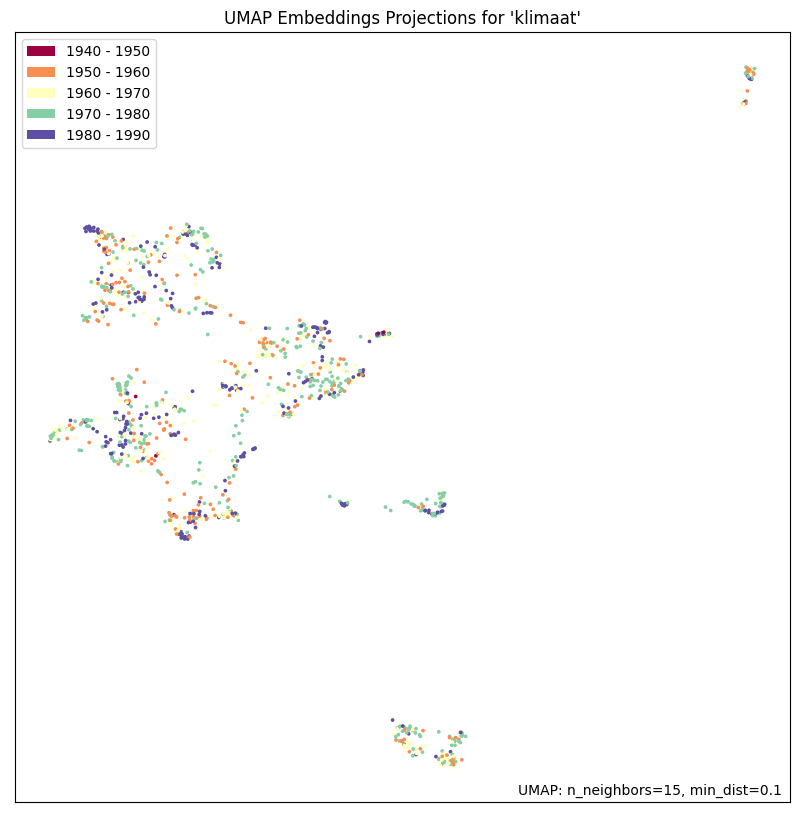

In [101]:
subplot = umap.plot.points(
    mapper, height=1000, width=1000, labels=anp.loc[indices_anp]["decade"]
)
subplot.set_title(title)


## Interactive

In [102]:
from bokeh.models import ColumnDataSource

df = anp.loc[indices_anp][["content", "year", "filename", "decade", "x", "y"]]
df["content"] = df["content"].str.replace(TERM, TERM.upper())
source = ColumnDataSource(data=df)
df


,content,year,filename,decade,x,y
886,Red.: Datum: Tijd: Onderwerp: halk 13. 1....,1952,anp_1952_01_13_16_ocr.xml,1950 - 1960,-1.444609,5.260012
2967,Red.: kram Datum: 9-2-1952 Tijd: ^^ Onderwe...,1952,anp_1952_02_09_31_ocr.xml,1950 - 1960,-0.387229,1.569968
2969,Red.: krnm Datum: Tijd: ' Onderwerp: ruim...,1952,anp_1952_02_09_33_ocr.xml,1950 - 1960,0.657594,1.059536
7559,Red.: Datum: Tijd: Onderwerp: mallon 8-4...,1952,anp_1952_04_08_13_ocr.xml,1950 - 1960,1.411448,5.908176
7910,Red.: Römijn Datum: 12 April Tijd: 23. 0...,1952,anp_1952_04_12_54_ocr.xml,1950 - 1960,-1.182853,3.066227
...,...,...,...,...,...,...
1469035,"Rad Datum: J3BL reijn 9*12-73 18, 19 VVD -...",1973,anp_1973_12_09_16_ocr.xml,1970 - 1980,2.848609,1.497620
1472390,Red. cas Datum: 31-22-73 Tijd: Onderwerp: ...,1973,anp_1973_12_31_120_ocr.xml,1970 - 1980,-2.457349,3.749665
1472447,Red.: Datum: Tijd: Onderwerp: cas 31-22-...,1973,anp_1973_12_31_47_ocr.xml,1970 - 1980,-2.533954,3.766583
1472454,"Red.: ..E. r?. s Datum: 31-12-73 Tijd: ,2...",1973,anp_1973_12_31_53_ocr.xml,1970 - 1980,-2.571280,3.755641


In [103]:
from bokeh.plotting import figure, show

p = figure(
    height=1000,
    width=1000,
    tooltips=[("filename", "@filename"), ("content", "@content"), ("year", "@year")],
)
p.title = title


In [104]:
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
import bokeh.palettes

categories = anp.decade.unique()
palette = bokeh.palettes.Category20[len(categories)]

assert len(palette) >= len(
    categories
), f"Palette has only {len(palette)} categories, but {len(categories)} needed."

color_mapper = CategoricalColorMapper(
    factors=[str(c) for c in categories], palette=palette
)
color_mapper


CategoricalColorMapper(id='2320', ...)

In [105]:
from bokeh.models.tickers import SingleIntervalTicker
from bokeh.plotting import figure, show

p = figure(
    height=1000,
    width=1000,
    tooltips=[("filename", "@filename"), ("content", "@content"), ("year", "@year")],
)
p.title = title

# TODO: group by decade to enable muting decades individually via legend
p.dot(
    x="x",
    y="y",
    legend_field="decade",
    source=source,
    size=20,
    color={"field": "decade", "transform": color_mapper},
)

p.legend.click_policy = "mute"


p.xaxis.ticker = SingleIntervalTicker(desired_num_ticks=0)
p.yaxis.ticker = SingleIntervalTicker(desired_num_ticks=0)

show(p)
